# 다나와에서 진공청소기를 크롤링하여 상품 비교하기

In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver=webdriver.Chrome("C:/Users/pc/Main/Data_Analysis/chromedriver_win32/chromedriver.exe")
url="http://search.danawa.com/dsearch.php?query=무선청소기&tab=main"
driver.get(url)

In [4]:
html=driver.page_source

from bs4 import BeautifulSoup
soup=BeautifulSoup(html, "html.parser")

In [46]:
prod_items=soup.select("div.main_prodlist>ul.product_list>li.prod_item")
len(prod_items)

44

In [20]:
#제품 이름
prod_items[0].select("p.prod_name>a")[0].text.strip()

'샤오미 드리미 V10'

In [24]:
#제품 스펙
prod_items[0].select("div.spec_list")[0].text.strip()

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 멀티싸이클론 / BLDC모터 / 흡입력: 140AW / 흡입력: 22000Pa / 소비전력: 450W / [배터리] 용량: 2500mAh / 충전시간: 3시간30분 / 사용시간: 1시간(개당) / [필터] 헤파필터 / H12급 / 5단계여과 / [구성] 바닥 / 침구 / 솔형 / 틈새 / 연장툴 / 거치대 / [부가] 먼지통용량: 0.5L / 색상: 화이트 / 무게: 1.5kg'

In [45]:
#제품 가격
price=prod_items[0].select("p.price_sect>a>strong")[0].text.strip().replace(",","")
price

'150080'

In [55]:
prod_data=[]

for prod_item in prod_items:
    if 'product-pot' in prod_item["class"]:
        continue
    try: 
        name=prod_item.select("p.prod_name>a")[0].text.strip()
        spec=prod_item.select("div.spec_list")[0].text.strip()
        price=prod_item.select("p.price_sect>a>strong")[0].text.strip().replace(",","")
        prod_data.append([name, spec, price])
    except:
        pass

print(len(prod_data))

40


In [56]:
# 함수 만들기

def get_prod_data(prod_items):
    prod_data=[]

    for prod_item in prod_items:
        if 'product-pot' in prod_item["class"]:
            continue
        try: 
            name=prod_item.select("p.prod_name>a")[0].text.strip()
            spec=prod_item.select("div.spec_list")[0].text.strip()
            price=prod_item.select("p.price_sect>a>strong")[0].text.strip().replace(",","")
            prod_data.append([name, spec, price])
        except:
            pass
    return prod_data

In [57]:
prod_items=soup.select("div.main_prodlist>ul.product_list>li.prod_item")
prod_data=get_prod_data(prod_items)
len(prod_data)

40

## 페이지 URL 분석

In [1]:
#여러 페이지를 크롤링할 떄...URL을 변경하여 페이지별 정보를 수집하고 병합한다.
def get_research_page_url(page):
    return "http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&previousKeyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2557&defaultVaTab=181232&tab=goods".format(page)

page=2
url=get_research_page_url(page)
url

'http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&previousKeyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2557&defaultVaTab=181232&tab=goods'

## 쥬피터 노트북의 진행표시줄 처리

In [6]:
import time
from tqdm.notebook import tqdm

total_page=10
for page in tqdm(range(1, total_page+1)):
    #페이지가 로딩 완료되기 위한 시간을 5초를 준다..
    time.sleep(5)

  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

## 여러 페이지에 걸친 상품정보 수집

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from tqdm.notebook import tqdm

#상품 정보 함수
def get_prod_data(prod_items):
    prod_data=[]

    for prod_item in prod_items:
        if 'product-pot' in prod_item["class"]:
            continue
        try: 
            name=prod_item.select("p.prod_name>a")[0].text.strip()
            spec=prod_item.select("div.spec_list")[0].text.strip()
            price=prod_item.select("p.price_sect>a>strong")[0].text.strip().replace(",","")
            prod_data.append([name, spec, price])
        except:
            pass
    return prod_data

driver = webdriver.Chrome("C:/Users/pc/Main/Data_Analysis/chromedriver_win32/chromedriver.exe")
driver.implicitly_wait(3)
    
total_page=10
prod_data_total=[]
for page in tqdm(range(1, total_page+1)):
    url=get_research_page_url(page)
    driver.get(url)
    time.sleep(5)
    
    #현재 페이지의html
    html=driver.page_source
    soup = BeautifulSoup(html,"html.parser")
    
    #상품 정보가져오기
    prod_items=soup.select("div.main_prodlist>ul.product_list>li.prod_item")
    prod_data=get_prod_data(prod_items)
    
    #추출 데이터 저장
    prod_data_total = prod_data_total +prod_data

  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
len(prod_data_total)

400

In [8]:
import pandas as pd
prod_data_total_df=pd.DataFrame(prod_data_total)
prod_data_total_df.columns=["제품명","스펙목록","가격"]
prod_data_total_df.head()

,제품명,스펙목록,가격
0,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 멀티싸이클론 /...,150080
1,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1190940
2,삼성전자 제트 VS20T9218QDCC,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 싸이클론 ...,568700
3,삼성전자 비스포크 제트 VS20A957D3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 제트싸이클...,919630
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",63140


In [9]:
prod_data_total_df.to_excel("C:/Users/pc/Main/Data_Analysis/prod_data_total.xlsx",index=False)

## 다나와 클롤링 전처리

1. 상품명 데이터에서 회사명과 제품명 분리
2. 일반 문자열로 저장된 스펙목록을 필요한 스펙으로 분류 및 단위 통합

In [5]:
import pandas as pd

datas=pd.read_excel("C:/Users/pc/Main/Data_Analysis/file/prod_data_total.xlsx")
datas.info()
datas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제품명     400 non-null    object
 1   스펙목록    400 non-null    object
 2   가격      400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,제품명,스펙목록,가격
0,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 멀티싸이클론 /...,150080
1,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1190940
2,삼성전자 제트 VS20T9218QDCC,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 싸이클론 ...,568700
3,삼성전자 비스포크 제트 VS20A957D3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 제트싸이클...,919630
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",63140


In [9]:
# 회사명과 모델명 정리하기

company_list=[]
product_list=[]

for titles in datas["제품명"]:
    title=titles.split(" ",1)
    company_name=title[0]
    product_name=title[1]
    company_list.append(company_name)
    product_list.append(product_name)

print(len(company_list))
print(len(product_list))
print(company_list[:5])
print(product_list[:5])

400
400
['샤오미', 'LG전자', '삼성전자', '삼성전자', '샤오미']
['드리미 V10', '오브제컬렉션 코드제로 ThinQ A9S AO9571', '제트 VS20T9218QDCC', '비스포크 제트 VS20A957D3', 'CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)']


In [12]:
# 스펙목록 데이터 살펴보기..

datas["스펙목록"][0].split(' / ')

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '흡입전용',
 '[성능] 멀티싸이클론',
 'BLDC모터',
 '흡입력: 140AW',
 '흡입력: 22000Pa',
 '소비전력: 450W',
 '[배터리] 용량: 2500mAh',
 '충전시간: 3시간30분',
 '사용시간: 1시간(개당)',
 '[필터] 헤파필터',
 'H12급',
 '5단계여과',
 '[구성] 바닥',
 '침구',
 '솔형',
 '틈새',
 '연장툴',
 '거치대',
 '[부가] 먼지통용량: 0.5L',
 '색상: 화이트',
 '무게: 1.5kg']

## 스펙목록(카테고리, 사용시간, 흡입력)을 추출해서 정리

In [13]:
#카테고리(리스트에서 0번째 값.)

spec_list = datas["스펙목록"][0].split(' / ')
spec_list

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '흡입전용',
 '[성능] 멀티싸이클론',
 'BLDC모터',
 '흡입력: 140AW',
 '흡입력: 22000Pa',
 '소비전력: 450W',
 '[배터리] 용량: 2500mAh',
 '충전시간: 3시간30분',
 '사용시간: 1시간(개당)',
 '[필터] 헤파필터',
 'H12급',
 '5단계여과',
 '[구성] 바닥',
 '침구',
 '솔형',
 '틈새',
 '연장툴',
 '거치대',
 '[부가] 먼지통용량: 0.5L',
 '색상: 화이트',
 '무게: 1.5kg']

In [15]:
#항상 첫번째 위치에 있음
category=spec_list[0]
category

'핸디/스틱청소기'

In [53]:
#사용시간과 흡입력 정보 추출
for spec in spec_list:
    if "사용시간" in spec:
        use_time_spec=spec
    elif "흡입력" in spec: #흡입력 단위
        suction_spec =spec
        
print(use_time_spec)
print(suction_spec)

사용시간: 1시간10분(개당)
흡입력: 25000Pa


In [29]:
#정량적인 수치 추출
use_time_value=use_time_spec.split(" ")[1].strip()
suction_value=suction_spec.split(" ")[1].strip()

'140AW'

In [103]:
category_list=[]
use_time_list=[]
suction_list=[]

for spec_data in datas["스펙목록"]:
    spec_list=spec_data.split(' / ')
    
    #카테고리
    category=spec_list[0]
    category_list.append(category)
    
    #사용시간과 흡입력 정보
    #사용시간과 흡입력 정보가 없는 제품을 위해 변수를 생성함
    use_time_value = None
    suction_value = None
    
    for spec in spec_list:
        if "사용시간" in spec:
            use_time_value=spec.split(" ")[1].strip()
        elif "흡입력" in spec: #흡입력 단위
            suction_value =spec.split(" ")[1].strip()
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

print(len(category_list), category_list[:5])
print(len(use_time_list), use_time_list[:5])
print(len(suction_list), suction_list[:5])

400 ['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기']
400 ['1시간(개당)', '1시간(개당)', '1시간(개당)', '1시간(개당)', '30분']
400 ['22000Pa', '210W', '200W', '210W', '16,800Pa']


## 사용시간 단위 통일시키기

In [104]:
use_time_list[:10] #시간 단위와 분 단위의 혼재

['1시간(개당)',
 '1시간(개당)',
 '1시간(개당)',
 '1시간(개당)',
 '30분',
 '9~30분',
 '1시간(개당)',
 '1시간10분(개당)',
 '1시간(개당)',
 '1시간(개당)']

In [105]:
# 시용시간을 분 단위로 조정하는 함수

def convert_time_minute(time):
    try:
        if "시간" in time:
            hour=time.split("시간")[0]
            if "분" in time:
                minute = time.split("시간")[-1].split("분")[0]
            else:
                minute=0 #분 없으면..그냥 0분
        else:
            hour=0
            minute = time.split("분")[0]
        return int(hour)*60+int(minute)
    except:
        return None

times = ["40분","1시간20분(개당)","3시간30분","4시간", "10분"]
for i in times:
    convert_time=convert_time_minute(i)
    print(convert_time)

40
80
210
240
10


In [106]:
use_time_list[3].split("시간")[0] #1시간

'1'

In [107]:
time="1시간20분"
time.split("시간")[-1].split("분")[0]

'20'

In [108]:
new_use_list=[]
for time in use_time_list:
    convert_time=convert_time_minute(time)
    new_use_list.append(convert_time)
new_use_list[:10]

[60, 60, 60, 60, 30, None, 60, 70, 60, 60]

In [109]:
use_time_list[:10]

['1시간(개당)',
 '1시간(개당)',
 '1시간(개당)',
 '1시간(개당)',
 '30분',
 '9~30분',
 '1시간(개당)',
 '1시간10분(개당)',
 '1시간(개당)',
 '1시간(개당)']

## 흡입력 단위 통일 시키기

In [110]:
# 흡입력 단위를 통일시키는 함수

def get_suction(value):
    try:
        value = value.upper() #모두 대문자로 변환
        if "AW" in value or "W" in value:
            result=value.replace("A","").replace("W","") #AW이든 W이든 모두 통일
            result = int(result.replace(",","")) #천 단위 모두 없애기...
        elif "PA" in value:
            result=value.replace("PA","")
            result = int(result.replace(",",""))/100 #1W=1AW=100PA
        else:
            result = None
        return result
    except:
        return None

In [111]:
new_suction_list=[]
for i in suction_list:
    value=get_suction(i)
    new_suction_list.append(value)

In [112]:
len(new_suction_list)

400

In [114]:
import pandas as pd
pd_data=pd.DataFrame()
pd_data["카테고리"]=category_list
pd_data["회사명"]=company_list
pd_data["제품명"]=product_list
pd_data["가격"]=datas["가격"]
pd_data["사용시간"]=new_use_list
pd_data["흡입력"]=new_suction_list

pd_data.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,150080,60.0,220.0
1,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1190940,60.0,210.0
2,핸디/스틱청소기,삼성전자,제트 VS20T9218QDCC,568700,60.0,200.0
3,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957D3,919630,60.0,210.0
4,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),63140,30.0,168.0


In [115]:
pd_data["카테고리"].value_counts()

핸디/스틱청소기        302
물걸레청소기           40
차량용청소기           32
욕실청소기            15
침구청소기             6
업소용청소기            2
진공청소기             1
로봇청소기             1
물걸레청소기+스팀청소기      1
Name: 카테고리, dtype: int64

In [116]:
pd_data_final = pd_data[pd_data["카테고리"]=="핸디/스틱청소기"]
len(pd_data_final)

302

In [117]:
pd_data_final.to_excel("C:/Users/pc/Main/Data_Analysis/file/best_product_final.xlsx", index=False)

In [118]:
danawa_data=pd.read_excel("C:/Users/pc/Main/Data_Analysis/file/best_product_final.xlsx")
danawa_data.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,150080,60.0,220.0
1,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1190940,60.0,210.0
2,핸디/스틱청소기,삼성전자,제트 VS20T9218QDCC,568700,60.0,200.0
3,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957D3,919630,60.0,210.0
4,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9370,697900,60.0,NaN


In [119]:
#흡입력 기준 정렬하기
top_list=danawa_data.sort_values(["흡입력"], ascending=False)
top_list.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
132,핸디/스틱청소기,아이닉,i20,188000,50.0,300.0
14,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48.0,290.0
300,핸디/스틱청소기,캐치웰,NEW F8,199000,25.0,290.0
116,핸디/스틱청소기,샤오미,드리미 T30,403340,90.0,270.0
38,핸디/스틱청소기,샤오미,드리미 V12,291100,90.0,270.0


In [120]:
#사용시간 기준 정렬
top_list=danawa_data.sort_values(["사용시간"], ascending=False)
top_list.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
224,핸디/스틱청소기,샤오미,이지에 YE-01,28500,120.0,NaN
38,핸디/스틱청소기,샤오미,드리미 V12,291100,90.0,270.0
39,핸디/스틱청소기,샤오미,드리미 V11,240870,90.0,250.0
116,핸디/스틱청소기,샤오미,드리미 T30,403340,90.0,270.0
164,핸디/스틱청소기,로보락,H7,449000,90.0,160.0


In [121]:
#여러 기준(사용시간, 흡입력) 정렬
top_list=danawa_data.sort_values(["사용시간","흡입력"], ascending=False)
top_list.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
224,핸디/스틱청소기,샤오미,이지에 YE-01,28500,120.0,NaN
38,핸디/스틱청소기,샤오미,드리미 V12,291100,90.0,270.0
116,핸디/스틱청소기,샤오미,드리미 T30,403340,90.0,270.0
39,핸디/스틱청소기,샤오미,드리미 V11,240870,90.0,250.0
164,핸디/스틱청소기,로보락,H7,449000,90.0,160.0


In [127]:
#평균값 정리하기

price_mean = danawa_data["가격"].mean()
time_mean = danawa_data["사용시간"].mean()
suction_mean = danawa_data["흡입력"].mean()
price_mean,time_mean , suction_mean

(368723.2450331126, 44.45804195804196, 182.9371727748691)

In [128]:
# 가성비 좋은 제품 확인하기

condition = (danawa_data["가격"]<=price_mean) & (danawa_data["사용시간"]>=time_mean) &(danawa_data["흡입력"]>=suction_mean)
condition_data=danawa_data[condition]
condition_data.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,150080,60.0,220.0
5,핸디/스틱청소기,델로라,V11 파워 300W,109000,70.0,220.0
13,핸디/스틱청소기,샤오미,TROUVER POWER 12,164670,60.0,220.0
14,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48.0,290.0
35,핸디/스틱청소기,샤오미,드리미 V9,298000,60.0,200.0


In [129]:
len(condition_data)

30

## 데이터 시각화

In [131]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform

#한글 설정
path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

%matplotlib inline

In [132]:
#결측값 없애기...Nan인 데이터 없애기

chart_data=danawa_data.dropna(axis=0)
len(chart_data)

189

In [133]:
#흡입력, 사용시간 최대값, 최소값, 평균값 구하기

suction_max = chart_data["흡입력"].max()
sucton_mean = chart_data["흡입력"].mean()
time_max = chart_data["사용시간"].max()
time_mean =chart_data["사용시간"].mean()

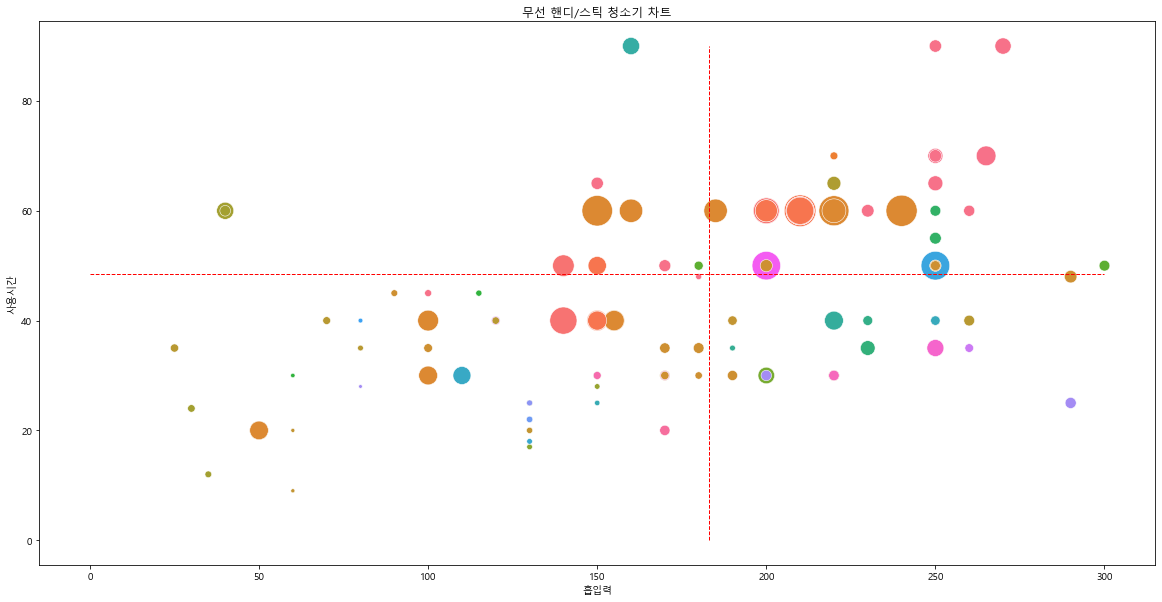

In [138]:
# 시각화 그리기

plt.figure(figsize=(20,10))
plt.title("무선 핸디/스틱 청소기 차트")
sns.scatterplot(x = "흡입력", y = "사용시간", size="가격", hue = chart_data["회사명"], data = chart_data, sizes=(10, 1000), legend=False)

# 평균값 선 넣기..
plt.plot((0,suction_max), (time_mean, time_mean), "r--", lw=1) #(x1, x2),(y1,y2)의 선을 그어버림..
plt.plot((suction_mean, suction_mean), (0, time_max), "r--", lw=1)
plt.show()

## 인기제품의 데이터 시각화

In [142]:
# 상위 인기 20위 이내의 인기제품만...
chart_data=chart_data[:20]

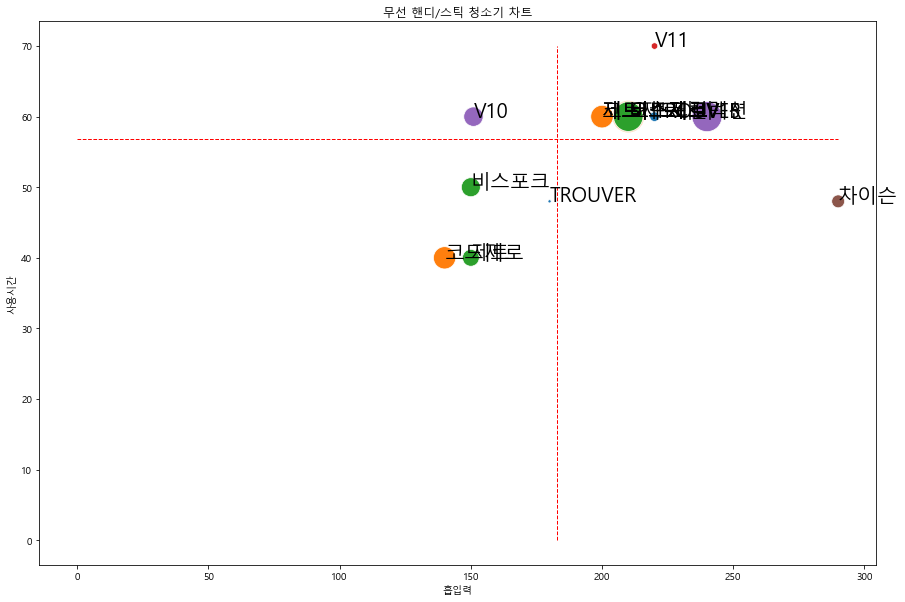

In [148]:
suction_max = chart_data["흡입력"].max()
sucton_mean = chart_data["흡입력"].mean()
time_max = chart_data["사용시간"].max()
time_mean =chart_data["사용시간"].mean()

# 시각화 그리기

plt.figure(figsize=(15,10))
plt.title("무선 핸디/스틱 청소기 차트")
sns.scatterplot(x = "흡입력", y = "사용시간", size="가격", hue = chart_data["회사명"], data = chart_data, sizes=(10, 1000), legend=False)

# 평균값 선 넣기..
plt.plot((0,suction_max), (time_mean, time_mean), "r--", lw=1) #(x1, x2),(y1,y2)의 선을 그어버림..
plt.plot((suction_mean, suction_mean), (0, time_max), "r--", lw=1)

#그래프에 텍스트 넣기..
for index, row in chart_data.iterrows(): #
    x = row["흡입력"]
    y = row["사용시간"]
    s = row["제품명"].split(" ")[0]
    plt.text(x,y,s, size=20)
plt.show()